In [ ]:
from tensorflow.keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image_directory = '/content/drive/MyDrive/BRIN/Segmentation-datasets/color/'
mask_directory = '/content/drive/MyDrive/BRIN/Segmentation-datasets/segmented/'

In [ ]:
SIZE = 256
num_images = 1000

Load images and masks in order so they match

In [ ]:
image_names = glob.glob("/content/drive/MyDrive/BRIN/Segmentation-datasets/color/*")
image_names.sort()
image_names_subset = image_names[0:num_images]
images = [cv2.imread(img) for img in image_names_subset]
image_dataset = np.array(images)
#image_dataset = np.expand_dims(image_dataset, axis = 3)

In [ ]:
image_names = glob.glob("/content/drive/MyDrive/BRIN/Segmentation-datasets/color/*")
image_names.sort()

In [ ]:
len(image_names)

18159

In [ ]:
image_names_subset = image_names[18018:18159]
images = [cv2.imread(img) for img in image_names_subset]
image_dataset = np.array(images)
#image_dataset = np.expand_dims(image_dataset, axis = 3)

In [ ]:
image_names_subset

['/content/drive/MyDrive/BRIN/Segmentation-datasets/color/fdc50285-836e-4707-a17d-388b8179c87c___RS_Erly.B 7812.JPG',
 '/content/drive/MyDrive/BRIN/Segmentation-datasets/color/fdc7082c-3132-409b-8b70-f10b478b3c75___UF.GRC_YLCV_Lab 02164.JPG',
 '/content/drive/MyDrive/BRIN/Segmentation-datasets/color/fdcb2e51-140c-4e58-9ede-f16530840d9d___YLCV_GCREC 2116.JPG',
 '/content/drive/MyDrive/BRIN/Segmentation-datasets/color/fdcb5a83-89e0-4d50-9460-28f36237e91d___GCREC_Bact.Sp 5742.JPG',
 '/content/drive/MyDrive/BRIN/Segmentation-datasets/color/fdce3f3b-0eac-42d8-9e54-1b756e35386c___UF.GRC_YLCV_Lab 02936.JPG',
 '/content/drive/MyDrive/BRIN/Segmentation-datasets/color/fdce96d3-64ce-49a6-ade4-1f812fef12f8___YLCV_GCREC 5181.JPG',
 '/content/drive/MyDrive/BRIN/Segmentation-datasets/color/fdd0012a-bf6a-4c3f-83b7-8e11a58f69d4___GCREC_Bact.Sp 6285.JPG',
 '/content/drive/MyDrive/BRIN/Segmentation-datasets/color/fdd1fcf3-2b4f-44ce-b2f1-7aa4fdba6a63___JR_Sept.L.S 2640.JPG',
 '/content/drive/MyDrive/BRIN/

Read masks the same way.

In [ ]:
mask_names = glob.glob("/content/drive/MyDrive/BRIN/Segmentation-datasets/mask_baru/*.npy")
mask_names.sort()
mask_names_subset = mask_names[0:num_images]
masks = [np.load(mask) for mask in mask_names_subset]
mask_dataset = np.array(masks)
mask_dataset = np.expand_dims(mask_dataset, axis = 3)

In [ ]:
mask_names = glob.glob("/content/drive/MyDrive/BRIN/Segmentation-datasets/mask_baru/*.npy")
mask_names.sort()

In [ ]:
mask_names_subset = mask_names[18018:18159]
masks = [np.load(mask) for mask in mask_names_subset]
mask_dataset = np.array(masks)
mask_dataset = np.expand_dims(mask_dataset, axis = 3)

In [ ]:
mask_names_subset

['/content/drive/MyDrive/BRIN/Segmentation-datasets/mask_baru/fdc50285-836e-4707-a17d-388b8179c87c___RS_Erly.B 7812_final_masked .npy',
 '/content/drive/MyDrive/BRIN/Segmentation-datasets/mask_baru/fdc7082c-3132-409b-8b70-f10b478b3c75___UF.GRC_YLCV_Lab 02164_final_masked .npy',
 '/content/drive/MyDrive/BRIN/Segmentation-datasets/mask_baru/fdcb2e51-140c-4e58-9ede-f16530840d9d___YLCV_GCREC 2116_final_masked .npy',
 '/content/drive/MyDrive/BRIN/Segmentation-datasets/mask_baru/fdcb5a83-89e0-4d50-9460-28f36237e91d___GCREC_Bact.Sp 5742_final_masked .npy',
 '/content/drive/MyDrive/BRIN/Segmentation-datasets/mask_baru/fdce3f3b-0eac-42d8-9e54-1b756e35386c___UF.GRC_YLCV_Lab 02936_final_masked .npy',
 '/content/drive/MyDrive/BRIN/Segmentation-datasets/mask_baru/fdce96d3-64ce-49a6-ade4-1f812fef12f8___YLCV_GCREC 5181_final_masked .npy',
 '/content/drive/MyDrive/BRIN/Segmentation-datasets/mask_baru/fdd0012a-bf6a-4c3f-83b7-8e11a58f69d4___GCREC_Bact.Sp 6285_final_masked .npy',
 '/content/drive/MyDrive

In [ ]:
#file_jelek = []
#for i in mask_names_subset:
#    mask_shape = np.load(i).shape
#    if mask_shape != (256, 256):
#        file_jelek.append(i)

In [ ]:
#file_jelek

In [ ]:
print("Image data shape is: ", image_dataset.shape)

Image data shape is:  (1000, 256, 256, 3)


In [ ]:
print("Image data shape is: ", image_dataset.shape)
print("Mask data shape is: ", mask_dataset.shape)
print("Max pixel value in image is: ", image_dataset.max())
# print("Labels in the mask are : ", np.unique(mask_dataset))

Image data shape is:  (1000, 256, 256, 3)
Mask data shape is:  (1000, 256, 256, 1)
Max pixel value in image is:  255


In [ ]:
#scaler = MinMaxScaler()

In [ ]:
#test_image_data=scaler.fit_transform(image_dataset_uint8.reshape(-1, image_dataset_uint8.shape[-1])).reshape(image_dataset_uint8.shape)

In [ ]:
#Normalize images
image_dataset = image_dataset /255.  #Can also normalize or scale using MinMax scaler
#Do not normalize m atmasks, just rescale to 0 to 1.
# mask_dataset = mask_dataset /255.  #PIxel values will be 0 or 1

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.20, random_state = 42)

In [ ]:
# Building Unet by dividing encoder and decoder into blocks

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras.optimizers import Adam
from keras.layers import Activation, MaxPool2D, Concatenate


def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)   #Not in the original network.
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)  #Not in the original network
    x = Activation("relu")(x)

    return x

#Encoder block: Conv block followed by maxpooling


def encoder_block(input, num_filters):
    x = conv_block(input, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p

#Decoder block
#skip features gets input from encoder for concatenation

def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

#Build Unet using the blocks
def build_unet(input_shape, n_classes):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    b1 = conv_block(p4, 1024) #Bridge

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    if n_classes == 1:  #Binary
      activation = 'sigmoid'
    else:
      activation = 'softmax'

    outputs = Conv2D(n_classes, 1, padding="same", activation=activation)(d4)  #Change the activation based on n_classes
    print(activation)

    model = Model(inputs, outputs, name="U-Net")
    return model

In [ ]:
IMG_HEIGHT = image_dataset.shape[1]
IMG_WIDTH  = image_dataset.shape[2]
IMG_CHANNELS = image_dataset.shape[3]

input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

In [ ]:
model = build_unet(input_shape, n_classes=1)
model.compile(optimizer=Adam(learning_rate = 1e-3), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

sigmoid
Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                     

In [ ]:
history = model.fit(X_train, y_train,
                    batch_size = 16,
                    verbose=1,
                    epochs=25,
                    validation_data=(X_test, y_test),
                    shuffle=False)

Epoch 1/25
50/50 [==============================] - 84s 1s/step - loss: 0.1337 - accuracy: 0.9493 - val_loss: 2.4087 - val_accuracy: 0.4937
Epoch 2/25
50/50 [==============================] - 48s 963ms/step - loss: 0.0844 - accuracy: 0.9659 - val_loss: 1.4304 - val_accuracy: 0.7701
Epoch 3/25
50/50 [==============================] - 47s 946ms/step - loss: 0.0819 - accuracy: 0.9658 - val_loss: 0.8727 - val_accuracy: 0.7847
Epoch 4/25
50/50 [==============================] - 46s 924ms/step - loss: 0.0727 - accuracy: 0.9679 - val_loss: 0.2260 - val_accuracy: 0.9267
Epoch 5/25
50/50 [==============================] - 48s 954ms/step - loss: 0.0706 - accuracy: 0.9682 - val_loss: 0.1036 - val_accuracy: 0.9617
Epoch 6/25
50/50 [==============================] - 46s 924ms/step - loss: 0.0678 - accuracy: 0.9689 - val_loss: 0.1324 - val_accuracy: 0.9533
Epoch 7/25
50/50 [==============================] - 46s 920ms/step - loss: 0.0674 - accuracy: 0.9691 - val_loss: 0.0909 - val_accuracy: 0.9659
Ep

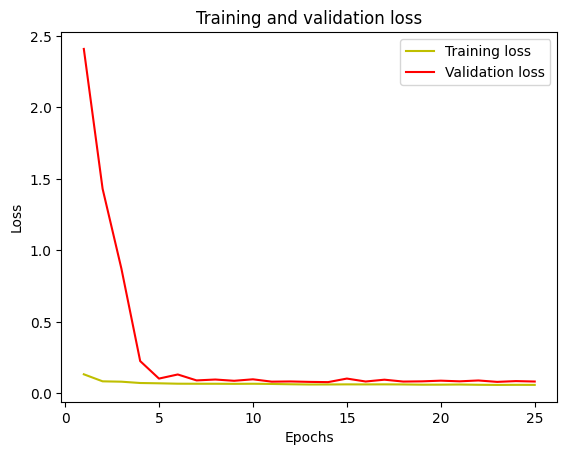

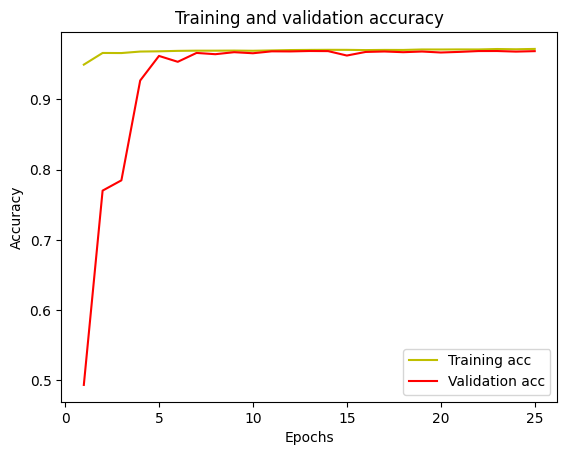

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Save the model for future use
model.save('/content/drive/MyDrive/BRIN/Segmentation-datasets/segmentasiPV1000.hdf5')

# **Load Model 2000**

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
savedModel=load_model('/content/drive/MyDrive/BRIN/Segmentation-datasets/segmentasiPV1000.hdf5')

In [ ]:
IMG_HEIGHT = image_dataset.shape[1]
IMG_WIDTH  = image_dataset.shape[2]
IMG_CHANNELS = image_dataset.shape[3]

input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

In [ ]:
history = savedModel.fit(X_train, y_train,
                    batch_size = 16,
                    verbose=1,
                    epochs=25,
                    validation_data=(X_test, y_test),
                    shuffle=False)

Epoch 1/25
50/50 [==============================] - 82s 980ms/step - loss: 0.0910 - accuracy: 0.9618 - val_loss: 0.1408 - val_accuracy: 0.9572
Epoch 2/25
50/50 [==============================] - 45s 905ms/step - loss: 0.0834 - accuracy: 0.9646 - val_loss: 0.0790 - val_accuracy: 0.9696
Epoch 3/25
50/50 [==============================] - 45s 893ms/step - loss: 0.0798 - accuracy: 0.9650 - val_loss: 0.2608 - val_accuracy: 0.8871
Epoch 4/25
50/50 [==============================] - 46s 920ms/step - loss: 0.0772 - accuracy: 0.9661 - val_loss: 0.1596 - val_accuracy: 0.9397
Epoch 5/25
50/50 [==============================] - 46s 924ms/step - loss: 0.0738 - accuracy: 0.9669 - val_loss: 0.0676 - val_accuracy: 0.9708
Epoch 6/25
50/50 [==============================] - 46s 926ms/step - loss: 0.0727 - accuracy: 0.9669 - val_loss: 0.0667 - val_accuracy: 0.9710
Epoch 7/25
50/50 [==============================] - 46s 923ms/step - loss: 0.0746 - accuracy: 0.9667 - val_loss: 0.0693 - val_accuracy: 0.9709

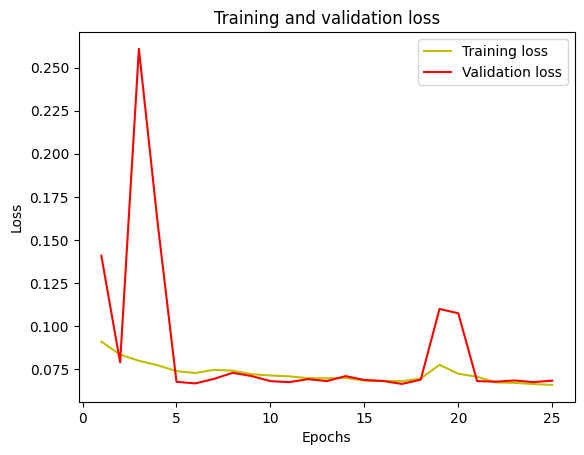

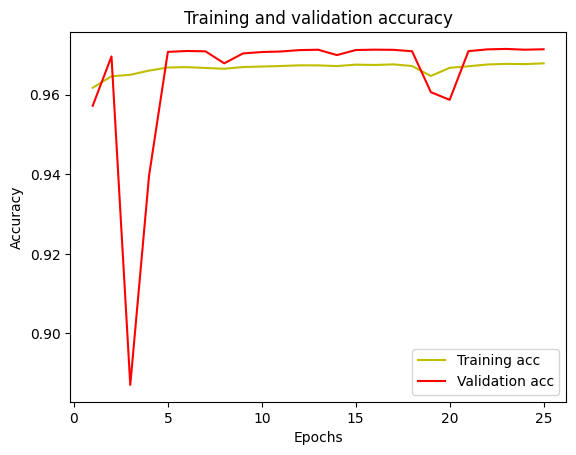

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Save the model for future use
savedModel.save('/content/drive/MyDrive/BRIN/Segmentation-datasets/segmentasiPV2000.hdf5')

# **Load Model 3000**

In [ ]:
savedModel=load_model('/content/drive/MyDrive/BRIN/Segmentation-datasets/segmentasiPV2000.hdf5')

In [ ]:
IMG_HEIGHT = image_dataset.shape[1]
IMG_WIDTH  = image_dataset.shape[2]
IMG_CHANNELS = image_dataset.shape[3]

input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

In [ ]:
history = savedModel.fit(X_train, y_train,
                    batch_size = 16,
                    verbose=1,
                    epochs=25,
                    validation_data=(X_test, y_test),
                    shuffle=False)

Epoch 1/25
7/7 [==============================] - 17s 3s/step - loss: 0.1152 - accuracy: 0.9558 - val_loss: 0.0668 - val_accuracy: 0.9708
Epoch 2/25
7/7 [==============================] - 6s 879ms/step - loss: 0.0646 - accuracy: 0.9702 - val_loss: 0.0619 - val_accuracy: 0.9727
Epoch 3/25
7/7 [==============================] - 6s 852ms/step - loss: 0.0680 - accuracy: 0.9641 - val_loss: 0.0649 - val_accuracy: 0.9697
Epoch 4/25
7/7 [==============================] - 6s 877ms/step - loss: 0.0609 - accuracy: 0.9703 - val_loss: 0.0734 - val_accuracy: 0.9678
Epoch 5/25
7/7 [==============================] - 6s 884ms/step - loss: 0.0575 - accuracy: 0.9714 - val_loss: 0.0880 - val_accuracy: 0.9630
Epoch 6/25
7/7 [==============================] - 6s 885ms/step - loss: 0.0558 - accuracy: 0.9715 - val_loss: 0.0721 - val_accuracy: 0.9674
Epoch 7/25
7/7 [==============================] - 6s 891ms/step - loss: 0.0520 - accuracy: 0.9739 - val_loss: 0.0641 - val_accuracy: 0.9706
Epoch 8/25
7/7 [======

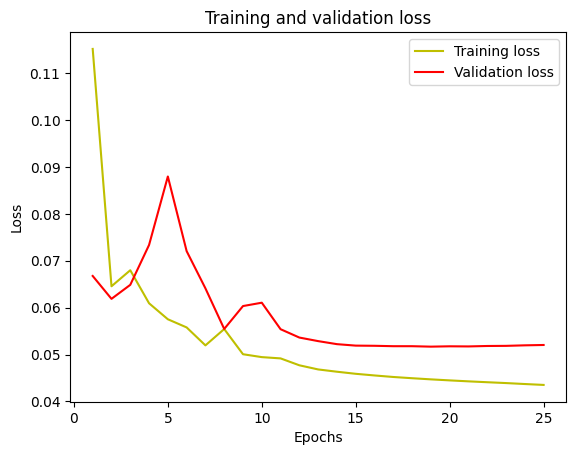

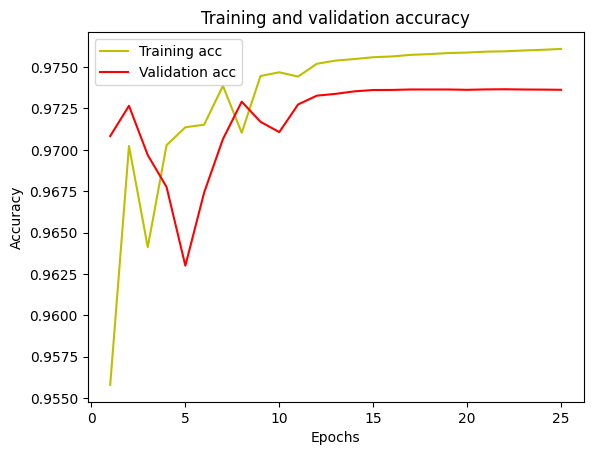

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Save the model for future use
savedModel.save('/content/drive/MyDrive/BRIN/Segmentation-datasets/segmentasiPV2000.hdf5')

# **Prediksi**

In [ ]:
#Load previously saved model
from keras.models import load_model
model = load_model("/content/drive/MyDrive/BRIN/Segmentation-datasets/segmentasiPV2000.hdf5", compile=False)

In [ ]:
#IOU
y_pred=model.predict(X_test)
y_pred_thresholded = y_pred > 0.5

7/7 [==============================] - 20s 426ms/step


In [ ]:
y_pred=model.predict(X_test)

7/7 [==============================] - 3s 493ms/step


In [ ]:
test_img_number = random.randint(0, len(X_test)-1)
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_input=np.expand_dims(test_img, 0)
print(test_img_input.shape)
prediction = np.squeeze((model.predict(test_img_input)).astype(np.uint8))
print(prediction.shape)

(1, 256, 256, 3)
1/1 [==============================] - 0s 22ms/step
(256, 256)


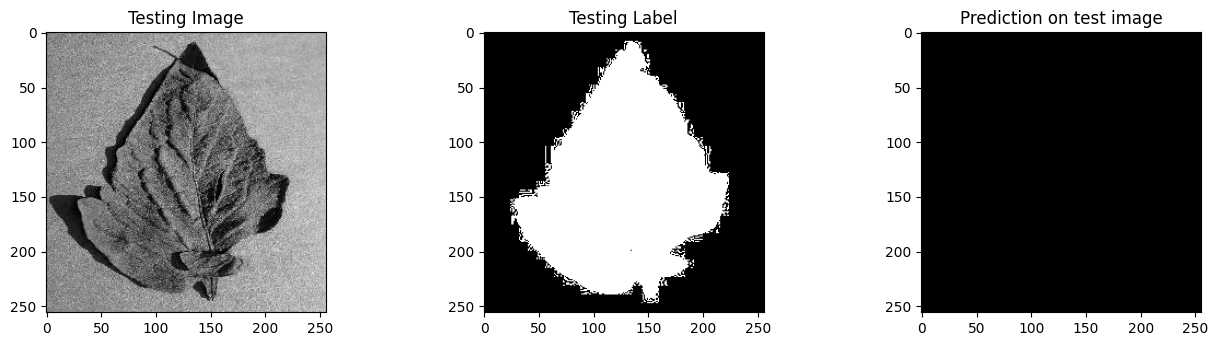

In [ ]:
import random
test_img_number = random.randint(0, len(X_test)-1)
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_input=np.expand_dims(test_img, 0)
print(test_img_input.shape)
prediction = np.squeeze((model.predict(test_img_input)).astype(np.uint8))
print(prediction.shape)

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')

plt.show()

(1, 256, 256, 3)
1/1 [==============================] - 0s 20ms/step
(256, 256)


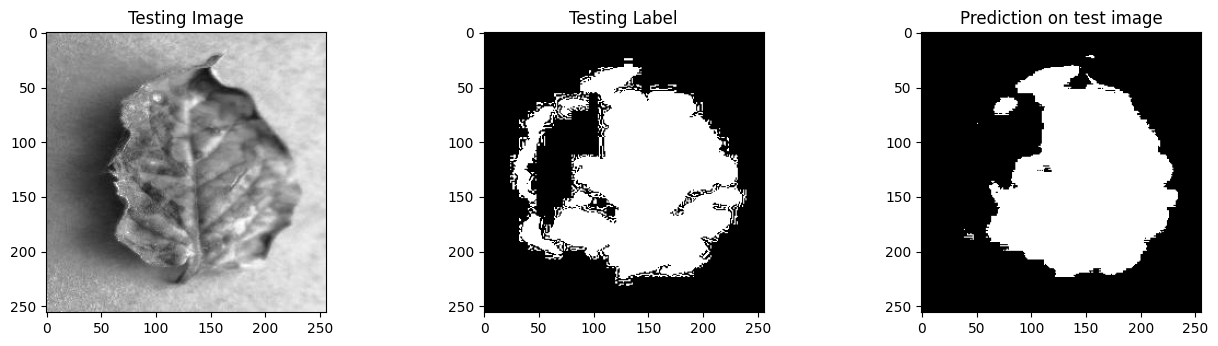

In [ ]:
threshold = 0.5
import random
test_img_number = random.randint(0, len(X_test)-1)
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_input=np.expand_dims(test_img, 0)
print(test_img_input.shape)
prediction = np.squeeze((model.predict(test_img_input)[0,:,:,0] > 0.5).astype(np.uint8))
print(prediction.shape)

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,1], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')

plt.show()

In [ ]:
image = np.squeeze(test_img)
image.shape

(256, 256, 3)

In [ ]:
def apply_mask_to_image(original_image, mask_image):
    original_image = original_image
    new_image = np.zeros_like(original_image)
    for i in range(mask_image.shape[0]):
        for j in range(mask_image.shape[1]):
            if mask_image[i, j] == 1:
                new_image[i, j, :] = original_image[i, j, :]

    return new_image.astype(np.uint8)

In [ ]:
a = apply_mask_to_image(image, prediction)

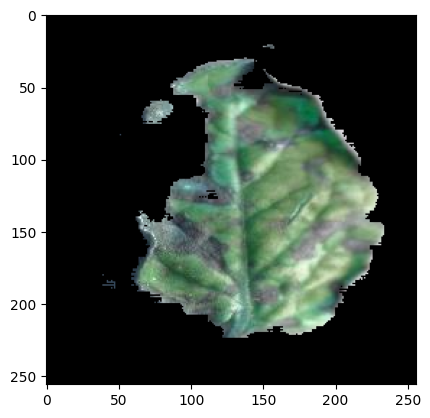

In [ ]:
plt.imshow(a)

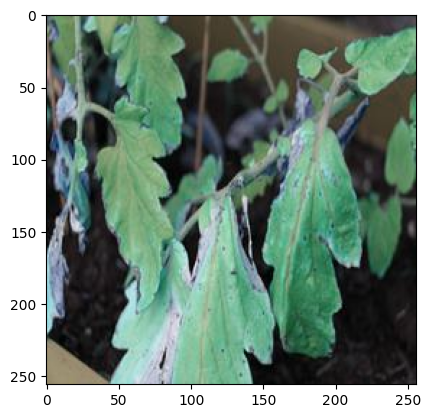

In [ ]:
test = cv2.imread('/content/drive/MyDrive/BRIN/PlantDoc-Dataset/train_tomato/Tomato Early blight leaf/Tomato Early blight leaf (1).jpg')
plt.imshow(test)

In [ ]:
testt = test/255

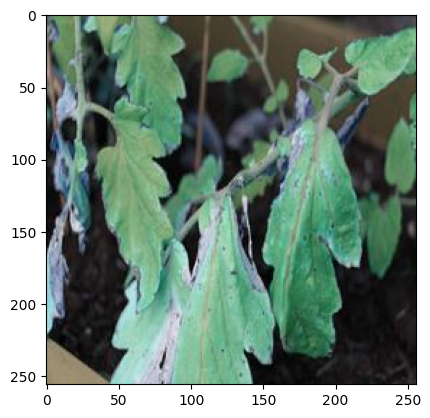

In [ ]:
plt.imshow(testt)

In [ ]:
testt = cv2.resize(testt, (256,256))

In [ ]:
testtt = np.expand_dims(testt, axis = 0)
testtt.shape

(1, 256, 256, 3)

In [ ]:
pred = np.squeeze((model.predict(testtt)[0,:,:,0] > 0.5).astype(np.uint8))

1/1 [==============================] - 0s 26ms/step


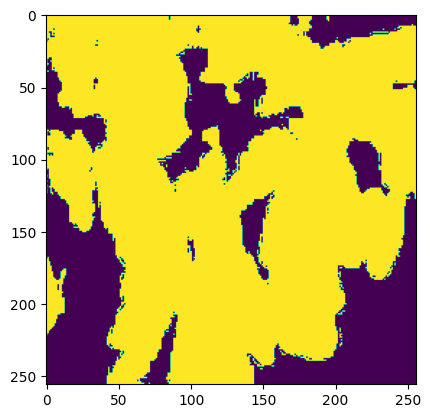

In [ ]:
plt.imshow(pred)

In [ ]:
pred

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
cv2.imwrite('pred2.jpg', pred)

True

In [ ]:
test.shape

(256, 256, 3)

In [ ]:
a = apply_mask_to_image(test, pred)

In [ ]:
cv2.imwrite('a.jpg', a)

True

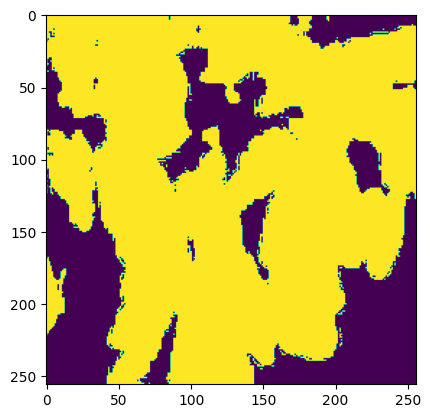

In [ ]:
 r, threshold = cv2.threshold(pred, 125, 255, cv2.THRESH_OTSU)
 plt.imshow(threshold)

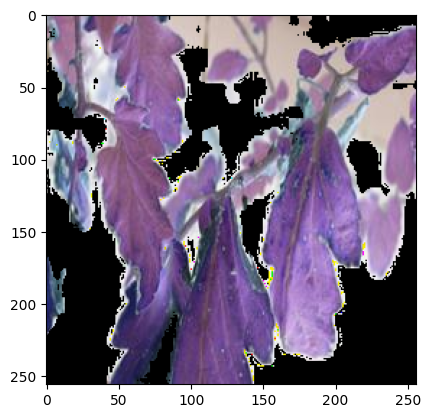

In [ ]:
image_rgb = cv2.cvtColor(a, cv2.COLOR_RGB2BGR)
plt.imshow(image_rgb)

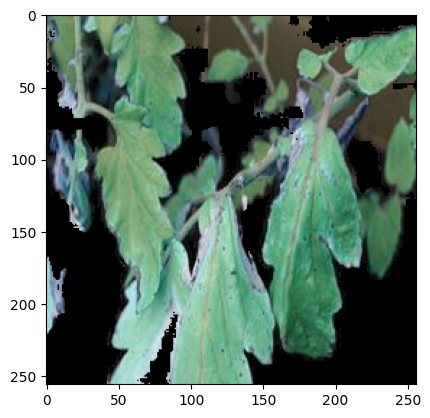

In [ ]:
plt.imshow(a)

# **Prediction Using Plant Docs**

In [ ]:
data_dir = glob.glob("/content/drive/MyDrive/BRIN/PD train-test ROI/Tomato___healthy/*")

In [ ]:
save_dir = '/content/drive/MyDrive/BRIN/PD train-test ROI/hasil_segmentasi/Tomato___healthy/'
for img in data_dir:
  image = cv2.imread(img)
  test = np.squeeze(cv2.resize(image, (256,256)))
  norm = test/255
  expand = np.expand_dims(norm, axis = 0)
  pred = np.squeeze((model.predict(expand)[0,:,:,0] > 0.5).astype(np.uint8))
  a = apply_mask_to_image(test, pred)
  name = img.split('/')[-1]
  cv2.imwrite(save_dir + name, a)

1/1 [==============================] - 0s 20ms/step


# **PREDICTION USING PLANT VILLAGE**

In [ ]:
data_dir = glob.glob("/content/drive/MyDrive/BRIN/Segmentation-datasets/color/*")

In [ ]:
save_dir = '/content/drive/MyDrive/BRIN/Segmentation-datasets/Hasil prediksi segmentasi/'
for img in data_dir:
  image = cv2.imread(img)
  test = np.squeeze(cv2.resize(image, (256,256)))
  norm = test/255
  expand = np.expand_dims(norm, axis = 0)
  pred = np.squeeze((model.predict(expand)[0,:,:,0] > 0.5).astype(np.uint8))
  a = apply_mask_to_image(test, pred)
  name = img.split('/')[-1]
  cv2.imwrite(save_dir + name, a)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 31ms/step
